<a href="https://colab.research.google.com/github/SokichiFujita/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Chapter6_DeepNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets

(500, 2) [[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.713577

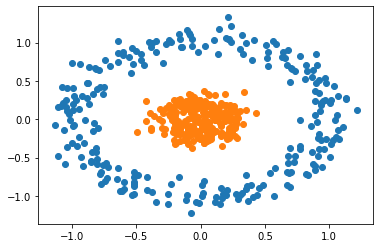

In [34]:
number_points = 500
X, y = datasets.make_circles(n_samples=number_points, random_state=123, noise=0.1, factor=0.2)
print(X.shape, X)
print(y.shape, y)

def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

scatter_plot()

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [0]:
class Model(nn.Module):
  def __init__(self,input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [36]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Text(0.5, 0, 'epoch')

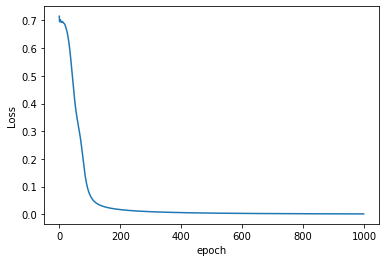

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [0]:
def plot_decision_boundary(X,y):
  x_span = np.linspace(min(X[:,0]), max(X[:,0]))
  y_span = np.linspace(min(X[:,1]), max(X[:,1]))
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,z)

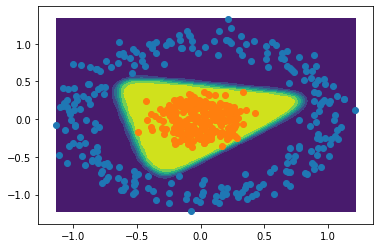

In [76]:
plot_decision_boundary(X,y)
scatter_plot()

prediction is 1


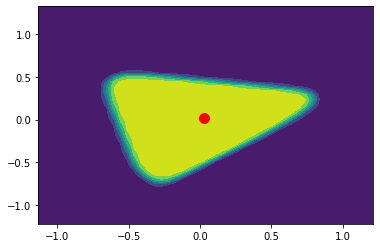

In [83]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color="red")
print("prediction is", prediction)
plot_decision_boundary(X,y)